# KMEANS algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('all_preprocessed.csv')
df.head()

,author,content,poem name,age,type,age_type
0,william shakespeare,let the bird of loudest layon the sole arabian...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
1,duchess of newcastle margaret cavendish,sir charles into my chamber coming in when i w...,An Epilogue to the Above,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
2,thomas bastard,our vice runs beyond all that old men saw and ...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
3,edmund spenser,lo i the man whose muse whilome did maske as ...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore
4,richard barnfield,long have i longd to see my love againe still ...,Sonnet 16,Renaissance,Mythology & Folklore,Renaissance Mythology & Folklore


In [3]:
tfidfVectorizer = TfidfVectorizer(stop_words='english')
vectorizedContent = tfidfVectorizer.fit_transform(df['content'])

In [4]:
authors = df[['author']]
numAuthors = len(authors['author'].unique())
print("In our dataset we have ", numAuthors, " unique authors.")
authorsFinal = pd.get_dummies(authors)

#one more way to encode categorical variables is via transposing
# authors = authors.reset_index()
# authorsFinal1 = authors.pivot_table(index=['index'], columns='author', values='author', observed=True, aggfunc=lambda x: 1/math.sqrt(numAuthors)).fillna(0)
authorsFinal

In our dataset we have  67  unique authors.


,author_archibald macleish,author_asil bunting,author_carl sandburg,author_christopher marlowe,author_conrad aiken,author_d h lawrence,author_duchess of newcastle margaret cavendish,author_e e cummings,author_edgar lee masters,author_edith sitwell,...,author_t s eliot,author_thomas bastard,author_thomas campion,author_thomas heywood,author_thomas lodge,author_thomas nashe,author_wallace stevens,author_william butler yeats,author_william byrd,author_william shakespeare
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
571,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
types = df[['type']]
numTypes = len(types['type'].unique())
print("In our dataset we have ", numTypes, " unique types.")
typesFinal = pd.get_dummies(types)/numTypes

typesFinal

In our dataset we have  3  unique types.


,type_Love,type_Mythology & Folklore,type_Nature
0,0.000000,0.333333,0.0
1,0.000000,0.333333,0.0
2,0.000000,0.333333,0.0
3,0.000000,0.333333,0.0
4,0.000000,0.333333,0.0
...,...,...,...
568,0.333333,0.000000,0.0
569,0.333333,0.000000,0.0
570,0.333333,0.000000,0.0
571,0.333333,0.000000,0.0


In [6]:
# tmpData = typesFinal.merge(right=authorsFinal, left_index=True, right_index=True)
tmpData = authorsFinal
finalData = (pd.DataFrame(vectorizedContent.toarray(), columns=tfidfVectorizer.get_feature_names_out())).merge(right=tmpData, left_index=True, right_index=True)
finalData.head()

,10,13,1538,19,1904,1914,1917,1919,1921,1922,...,author_t s eliot,author_thomas bastard,author_thomas campion,author_thomas heywood,author_thomas lodge,author_thomas nashe,author_wallace stevens,author_william butler yeats,author_william byrd,author_william shakespeare
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# # reduce the dimensionality of the data using PCA
# pca = PCA(n_components=50)
# reduced_data = pca.fit_transform(finalData)
# reduced_data

In [8]:
colors = ['red', 'green', 'blue', 'purple', 'brown','pink', 'orange', 'darkblue', 'yellow', 'darkgreen']

In [9]:
def drawPlot(nClusters, labels, xs, ys, model):
    if labels == []:
        labels = ['cluster ' + str(i+1) for i in range(nClusters+1)]

    plt.figure(figsize=(8, 8))
    for i in range(nClusters):
        plt.scatter(reduced_data[model.labels_ == i, 0],
                    reduced_data[model.labels_ == i, 1], 
                    s=10, color=colors[i], 
                    label=f' {labels[i]}')
    # plt.axis([-1, 0.5, -0.5, 0.5])
    plt.legend()
    plt.show()

## KMEANS - original

### Choosing K

We are choosing k via Elbow method:

In [10]:
ks = range(2, 10)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    kmeans.fit(finalData)
    inertias.append(kmeans.inertia_)

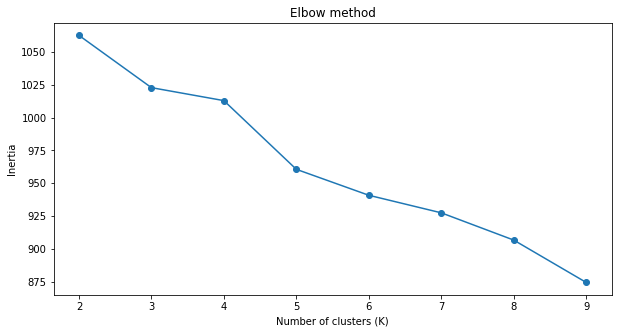

In [11]:
fig = plt.figure(figsize=(10, 5))
plt.plot(ks, inertias, marker='o')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters (K)')
plt.title('Elbow method')
plt.show()

### K = 5

In [12]:
k = 5

### Model creation and training

In [13]:
model = KMeans(n_clusters=k, init='k-means++', n_init=30, max_iter=400, tol=0.00001)

In [14]:
model.fit(finalData)

KMeans(max_iter=400, n_clusters=5, n_init=30, tol=1e-05)

### Reduce the dimensionality of the data using PCA for plot creation

In [15]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(finalData)
reduced_data

array([[ 0.91458481,  0.00897196],
       [-0.09053812,  0.00339663],
       [-0.09095536, -0.00173149],
       ...,
       [-0.14356091, -0.0097139 ],
       [-0.11646456, -0.00622446],
       [-0.0670327 , -0.02034402]])

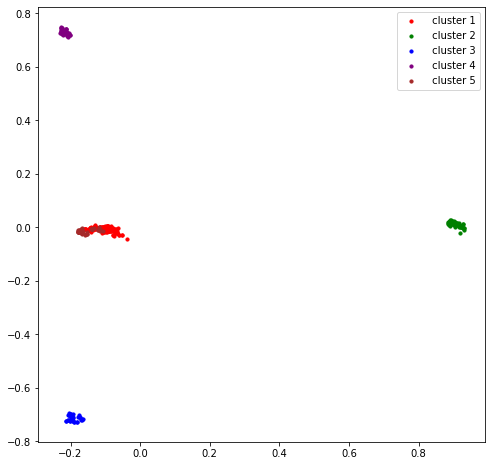

In [16]:
colors = ['red', 'green', 'blue', 'purple', 'brown','pink']
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

plt.figure(figsize=(8, 8))
for i in range(k):
    plt.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
# plt.axis([-1, 0.5, -0.5, 0.5])
plt.legend()
plt.show()

## KMEANS with PCA

In [17]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(finalData)
reduced_data

array([[ 0.91458497,  0.00895576],
       [-0.09053836,  0.0034174 ],
       [-0.09095589, -0.00169814],
       ...,
       [-0.14356099, -0.00967157],
       [-0.11647883, -0.00607666],
       [-0.06703207, -0.02038625]])

In [18]:
ks = range(2, 10)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)

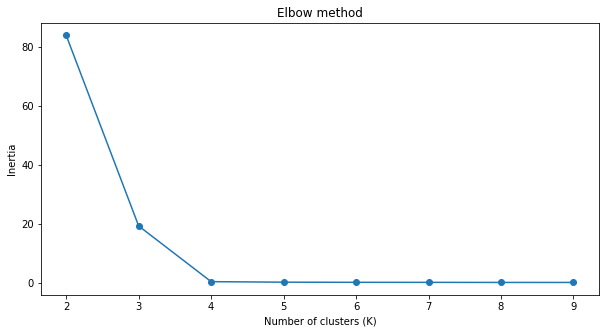

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.plot(ks, inertias, marker='o')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters (K)')
plt.title('Elbow method')
plt.show()

In [20]:
k = 4  

In [21]:
model = KMeans(n_clusters=k, init='k-means++', n_init=30, max_iter=400, tol=0.00001)

In [22]:
model.fit(reduced_data)

KMeans(max_iter=400, n_clusters=4, n_init=30, tol=1e-05)

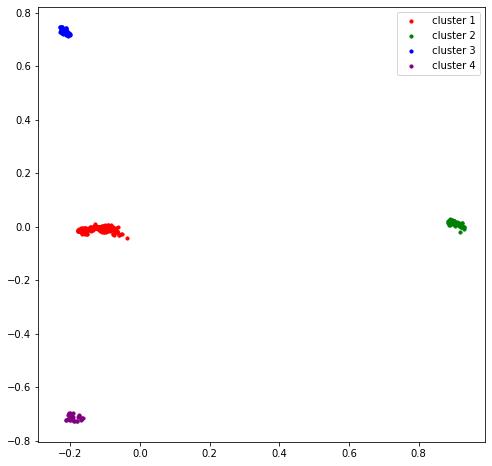

In [23]:
cluster = ['cluster ' + str(i+1) for i in range(k+1)]

plt.figure(figsize=(8, 8))
for i in range(k):
    plt.scatter(reduced_data[model.labels_ == i, 0],
                reduced_data[model.labels_ == i, 1], 
                s=10, color=colors[i], 
                label=f' {cluster[i]}')
# plt.axis([-1, 0.5, -0.5, 0.5])
plt.legend()
plt.show()

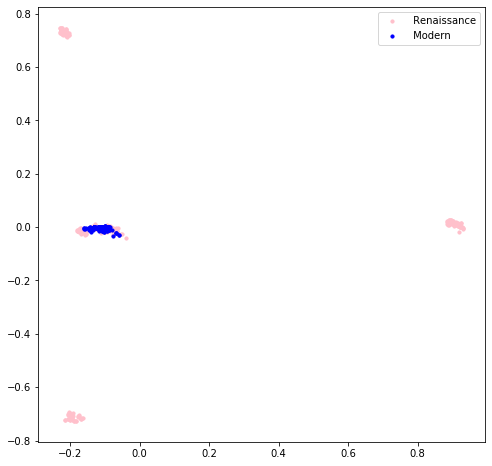

In [24]:
colors = ['pink', 'blue']
ages = df.age.unique()

plt.figure(figsize=(8, 8))
i = 0
for a in ages:
    ids = df.index[df['age'] == a].tolist()
    plt.scatter(np.array(reduced_data)[ids, 0],
                np.array(reduced_data)[ids, 1], 
                s=10, color=colors[i], 
                label=f' {ages[i]}')
    i+=1
# plt.axis([-1, 0.5, -0.5, 0.5])
plt.legend()
plt.show()